In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tdqm
import networkx as nx
%matplotlib inline

In [2]:
df_classes = pd.read_csv('../datasets/elliptic_txs_classes.csv')
df_classes.head()

,txId,class
0,230425980,unknown
1,5530458,unknown
2,232022460,unknown
3,232438397,2
4,230460314,unknown


In [3]:
df_edges = pd.read_csv('../datasets/elliptic_txs_edgelist.csv')
df_edges.head()

,txId1,txId2
0,230425980,5530458
1,232022460,232438397
2,230460314,230459870
3,230333930,230595899
4,232013274,232029206


In [4]:
df_features = pd.read_csv('../datasets/elliptic_txs_features.csv')
df_features.head()

,230425980,1,-0.1714692896288031,-0.18466755143291433,-1.2013688016765636,-0.12196959975910057,-0.04387454791734898,-0.11300200928476244,-0.06158379407303222,-0.16209679981659642,...,-0.5621534802884299,-0.6009988905192808,1.4613303209554889,1.4613689382001922,0.01827940003744589,-0.0874901561101501,-0.13115530389558736,-0.09752359377152515,-0.12061340670311574,-0.11979245961251665
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [5]:
df_features.columns = ['id', 'time step'] + [f'trans_feat_{i}' for i in range(93)] + [f'agg_feat_{i}' for i in range(72)]
df_features.head()

,id,time step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
0,5530458,1,-0.171484,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162112,...,0.947382,0.673103,-0.979074,-0.978556,0.018279,-0.087490,-0.131155,-0.097524,-0.120613,-0.119792
1,232022460,1,-0.172107,-0.184668,-1.201369,-0.121970,-0.043875,-0.113002,-0.061584,-0.162749,...,0.670883,0.439728,-0.979074,-0.978556,-0.098889,-0.106715,-0.131155,-0.183671,-0.120613,-0.119792
2,232438397,1,0.163054,1.963790,-0.646376,12.409294,-0.063725,9.782742,12.414558,-0.163645,...,-0.577099,-0.613614,0.241128,0.241406,1.072793,0.085530,-0.131155,0.677799,-0.120613,-0.119792
3,230460314,1,1.011523,-0.081127,-1.201369,1.153668,0.333276,1.312656,-0.061584,-0.163523,...,-0.511871,-0.400422,0.517257,0.579382,0.018279,0.277775,0.326394,1.293750,0.178136,0.179117
4,230459870,1,0.961040,-0.081127,-1.201369,1.303743,0.333276,1.480381,-0.061584,-0.163577,...,-0.504702,-0.422589,-0.226790,-0.117629,0.018279,0.277775,0.413931,1.149556,-0.696053,-0.695540


In [6]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203768 entries, 0 to 203767
Columns: 167 entries, id to agg_feat_71
dtypes: float64(165), int64(2)
memory usage: 259.6 MB


In [7]:
df_features.describe()

,id,time step,trans_feat_0,trans_feat_1,trans_feat_2,trans_feat_3,trans_feat_4,trans_feat_5,trans_feat_6,trans_feat_7,...,agg_feat_62,agg_feat_63,agg_feat_64,agg_feat_65,agg_feat_66,agg_feat_67,agg_feat_68,agg_feat_69,agg_feat_70,agg_feat_71
count,2.037680e+05,203768.000000,2.037680e+05,2.037680e+05,203768.000000,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,...,203768.000000,203768.000000,203768.000000,203768.000000,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05,2.037680e+05
mean,1.711307e+08,23.844073,8.414927e-07,9.062637e-07,0.000006,5.985709e-07,2.153162e-07,5.545621e-07,3.022251e-07,7.954968e-07,...,0.000003,0.000003,-0.000007,-0.000007,-8.970692e-08,4.293616e-07,6.436502e-07,4.786011e-07,5.919153e-07,5.878865e-07
std,1.104656e+08,15.172123,1.000005e+00,1.000005e+00,1.000001,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,...,1.000004,1.000004,1.000000,1.000000,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,1.076000e+03,1.000000,-1.729826e-01,-2.105526e-01,-1.756361,-1.219696e-01,-6.372457e-02,-1.130020e-01,-6.158379e-02,-1.636459e-01,...,-0.577099,-0.626229,-0.979074,-0.978556,-2.160569e-01,-1.259391e-01,-1.311553e-01,-2.698175e-01,-1.760926e+00,-1.760984e+00
25%,8.433451e+07,9.000000,-1.725317e-01,-1.803266e-01,-1.201369,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.635168e-01,...,-0.569626,-0.594691,-0.979074,-0.978556,-9.888874e-02,-8.749016e-02,-1.311553e-01,-1.405971e-01,-1.206134e-01,-1.197925e-01
50%,1.624374e+08,23.000000,-1.692045e-01,-1.328975e-01,0.463609,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.620440e-01,...,-0.479951,-0.455928,0.241128,0.241406,1.827940e-02,-8.749016e-02,-1.311553e-01,-9.752359e-02,-1.206134e-01,-1.197925e-01
75%,2.454798e+08,38.000000,-1.318532e-01,-5.524241e-02,1.018602,-1.219696e-01,-4.387455e-02,-1.130020e-01,-6.158379e-02,-1.355929e-01,...,0.155250,0.121274,1.305483,1.398764,1.827940e-02,-8.749016e-02,-8.467423e-02,-9.752359e-02,1.520490e-01,1.199793e-01
max,4.032446e+08,49.000000,7.168197e+01,7.359505e+01,2.683580,4.902760e+01,2.600907e+02,5.456518e+01,1.134409e+02,7.335457e+01,...,7.862953,7.914041,1.461330,1.461369,1.170692e+02,2.518490e+02,2.387835e+02,1.057340e+02,1.519700e+00,1.521399e+00


In [8]:
df_features = pd.merge(df_features, df_classes, left_on='id', right_on='txId', how='left')

In [9]:
short_edges = df_edges.loc[(df_edges['txId1'] == 226677128) | (df_edges['txId2'] == 226677128)]


In [10]:
len(short_edges)

18

In [11]:
pos = {}
labels = {}
count_t = 0
count_s = 0
for source, target in short_edges.values:
    if (source != 226677128):
        labels[source] = f"tx_in{count_s+1}"
        pos[source] = np.array([0.2, 1 - count_s / 10])
        count_s += 1
    if (target != 226677128):
        labels[target] = f"tx_out{count_t+1}"
        pos[target] = np.array([0.8, 1 - count_t / 8])
        count_t += 1
pos[226677128] = np.array([0.5, 0.5])
labels[226677128] = f"tx"


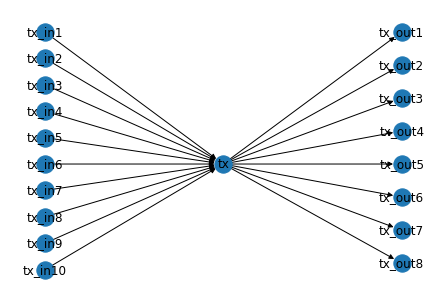

In [12]:
graph = nx.from_pandas_edgelist(short_edges, source='txId1', target='txId2',
                                create_using=nx.DiGraph())
nx.draw(graph, cmap=plt.get_cmap('rainbow'), pos=pos, labels=labels)


In [13]:
source = df_edges['txId1'].value_counts().to_dict()
target = df_edges['txId2'].value_counts().to_dict()
{i : (source[i], target.get(i,0)) for i in source.keys()}

{2984918: (472, 1),
 89273: (288, 1),
 102570: (122, 0),
 3181: (112, 1),
 7952: (99, 1),
 1891081: (95, 0),
 143705: (92, 0),
 565334: (90, 1),
 488266: (88, 1),
 793584: (82, 1),
 4600600: (76, 0),
 792948: (74, 1),
 3185686: (72, 0),
 1192279: (69, 0),
 5678249: (67, 0),
 36460504: (65, 1),
 847323: (64, 0),
 520060: (62, 1),
 65253: (53, 0),
 3180883: (51, 0),
 3889: (50, 0),
 411947: (48, 0),
 5689045: (43, 0),
 708454: (42, 0),
 2747803: (41, 1),
 459148: (41, 0),
 1574896: (40, 0),
 35410716: (38, 0),
 269873: (38, 0),
 1286098: (38, 1),
 16827115: (37, 0),
 377642: (34, 0),
 314705: (34, 0),
 180735: (34, 0),
 5684082: (33, 0),
 4846284: (33, 0),
 433530: (33, 0),
 7696903: (33, 0),
 2347070: (32, 0),
 2644634: (31, 0),
 2226596: (30, 1),
 1503261: (30, 0),
 17500202: (29, 0),
 2566132: (29, 0),
 2263906: (28, 0),
 1991588: (28, 1),
 5473: (28, 1),
 1913117: (28, 0),
 6472187: (27, 0),
 187079: (27, 0),
 14487702: (27, 1),
 7278020: (27, 1),
 774002: (27, 1),
 7916230: (27, 0),

In [125]:
ids = df_features.loc[(df_features['time step'] == 27) & ((df_features['class'] == '1') | (df_features['class'] == '2')), 'id']
short_edges = df_edges.loc[(df_edges['txId1'].isin(ids)) & (df_edges['txId2'].isin(ids))]
short_classes = df_features.loc[df_features['id'].isin(ids)][['id', 'class']]


In [126]:
short_classes['class'].value_counts()

2    182
1     24
Name: class, dtype: int64

In [127]:
# node1 = [short_classes.loc[i]['id'] for i in short_classes.index if short_classes.loc[i]['class'] == '1']
# node2 = [short_classes.loc[i]['id'] for i in short_classes.index if short_classes.loc[i]['class'] == '2']

In [133]:
short_classes.loc[short_classes['id'] == '294324914']


,id,class


In [140]:
node1 = []
node2 = []
for tx1 in short_edges['txId1']:
    target = short_classes.loc[(short_classes['id'] == tx1)]
    if (len(target) == 1):
        if (target.loc[target.index[0]]['class'] == '1'):
            node1.append(tx1)
        elif (target.loc[target.index[0]]['class'] == '2'):
            node2.append(tx1)
for tx2 in short_edges['txId2']:
    target = short_classes.loc[(short_classes['id'] == tx2)]
    if (len(target) == 1):
        if (target.loc[target.index[0]]['class'] == '1'):
            node1.append(tx2)
        elif (target.loc[target.index[0]]['class'] == '2'):
            node2.append(tx2)


In [141]:
graph = nx.from_pandas_edgelist(short_edges, source='txId1', target='txId2',
                                create_using=nx.DiGraph())

In [142]:
for tx in ids:
    if tx not in short_edges['txId1'].values:
        graph.add_node(tx)
    elif tx not in short_edges['txId2'].values:
        graph.add_node(tx)

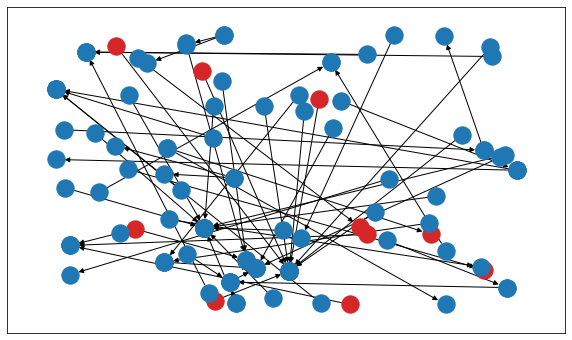

In [144]:
plt.figure(figsize=(10, 6))
pos = nx.random_layout(graph)
_ = nx.draw_networkx_nodes(graph, pos, nodelist=node1, node_color='tab:red')
_ = nx.draw_networkx_nodes(graph, pos, nodelist=node2, node_color='tab:blue')
_ = nx.draw_networkx_edges(graph, pos)
plt.show()